In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

Data for FEM attached to box. Box is rotated such that antennas are pointing up (alt = 0).


SNAP: C000091

SNAP input : E6

Fiber 5 (the short one) : A to east, B to north

PAM 376: both inputs

FEM 348 (the one on the box): both inputs

Antennas: brass bicone antenna on North, blue bicolog on East

In [2]:
dt = np.dtype(np.int32).newbyteorder(">")
freq = np.linspace(0, 250, num=1024, endpoint=False)
POLS = {"north": "0", "east": "1"}

def get_max(d):
    """
    Max val
    """
    return np.max(d[1:])

def read_dat(fname):
    data = {}
    norm_data = {}  # peak normalized
    for pol in ["north", "east"]:
        path = f"data/box_fem/{fname}"
        d = np.frombuffer(np.load(path)[POLS[pol]], dtype=dt).astype(float)
        norm_d = d / get_max(d)
        data[pol] = d
        norm_data[pol] = norm_d
    return data, norm_data

def plot_data(data, log=True):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_norm(data, ref_max, log=True):
    """
    data : dict, peak normalized data
    ref_max : float, value to set peak to
    """
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d * ref_max, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_ratio(data, ref_inp="east", log=True):
    """
    Ratio between all the signals and a reference signal. The reference signal is specfied by
    ``ref_inp''.
    
    data : dict, peak normalized data
    ref_inp : the input signal to normalize by
    """
    ref_signal = data[ref_inp]
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d / ref_signal, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_noise(data):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")
    plt.legend()
    plt.ylim(-0.5, 0.5)
    plt.show()

<IPython.core.display.Javascript object>


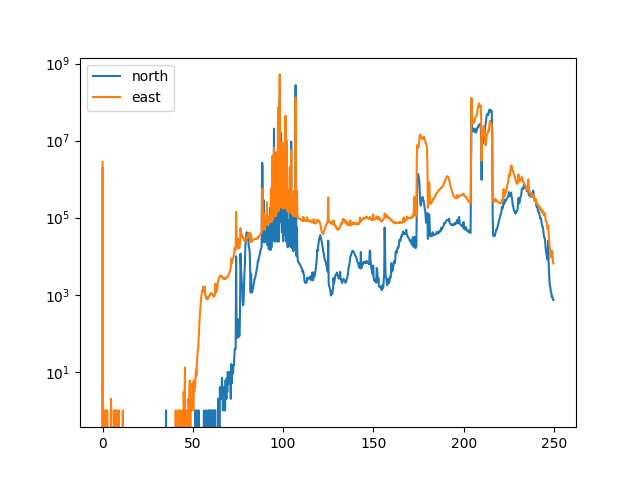

<IPython.core.display.Javascript object>


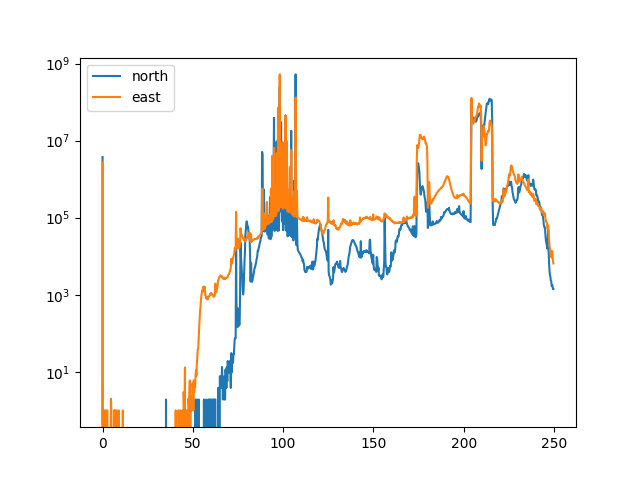

<IPython.core.display.Javascript object>


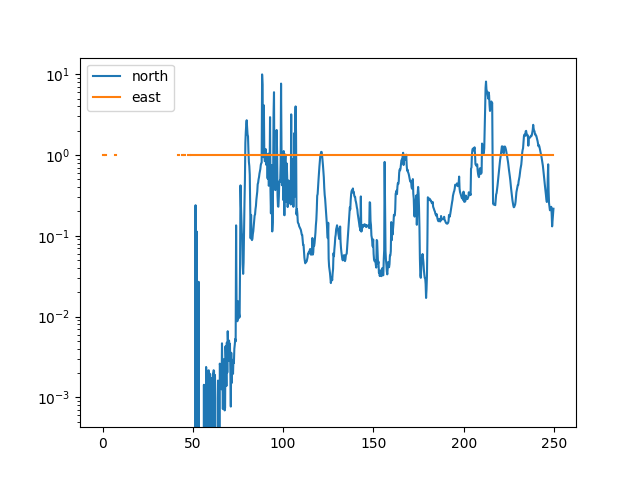

/tmp/ipykernel_59032/1825586863.py:58: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq, d / ref_signal, label=f"{inp}")
/tmp/ipykernel_59032/1825586863.py:58: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq, d / ref_signal, label=f"{inp}")


<IPython.core.display.Javascript object>


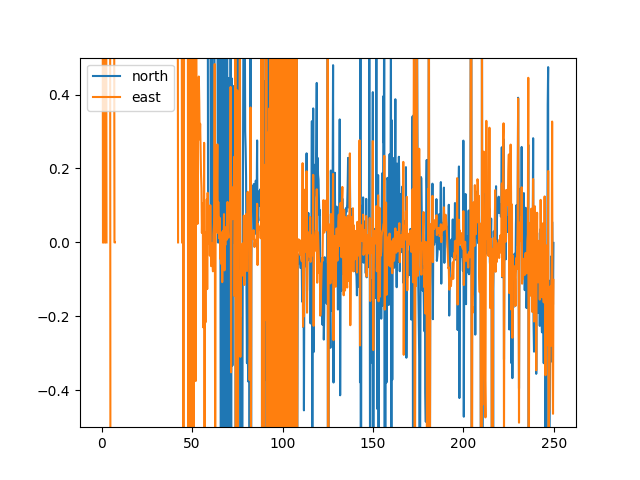

/tmp/ipykernel_59032/1825586863.py:68: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")
/tmp/ipykernel_59032/1825586863.py:68: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")


In [3]:
# no antennas attached:

no_ant, norm_no_ant = read_dat("buck_no_antenna_atten8.npz")

plot_data(no_ant)
plot_norm(norm_no_ant, get_max(no_ant["east"]))
plot_ratio(norm_no_ant, ref_inp="east")
plot_noise(no_ant)

In [36]:
# antennas attached
data = {}
norm = {}
atten = [0, 8, 15]  # pam attenuation
for p in ["ps", "buck"]:  # pam power from 6V power supply or 12V power supply + buck converter
    data[p] = {}
    norm[p] = {}
    for a in atten:
        d, nd = read_dat(f"{p}_with_antenna_atten{a}.npz")
        data[p][a] = d
        norm[p][a] = nd

In [10]:
def atten_plots(d, atten=[0, 8, 15]):
    for a in atten:
        plt.figure()
        plt.title(f"PAM attenuation = {a}")
        for p, ls in zip(["ps", "buck"], ["-", "--"]):
            for pol in POLS:
                plt.plot(freq, d[p][a][pol], label=f"{p}, {pol}", ls=ls)
        plt.legend()
        plt.yscale("log")
        plt.show()

def power_plots(d, atten=[0, 8, 15]):
    for p in ["ps", "buck"]:
        plt.figure()
        plt.title(f"{p}")
        for a in atten:
            for pol in POLS:
                plt.plot(freq, d[p][a][pol], label=f"{a}, {pol}")
        plt.legend()
        plt.yscale("log")
        plt.show()

<IPython.core.display.Javascript object>


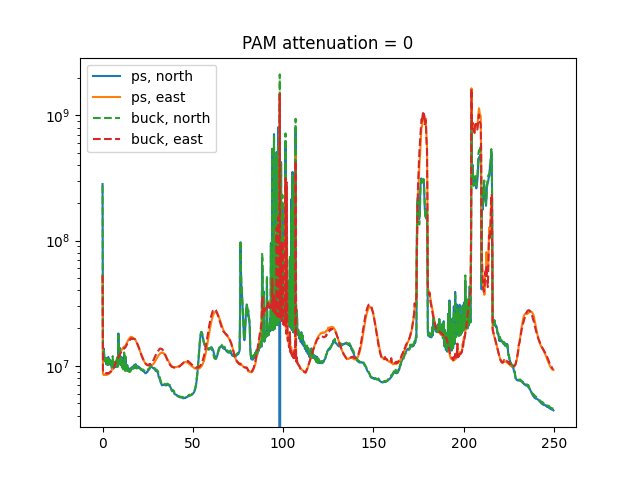

<IPython.core.display.Javascript object>


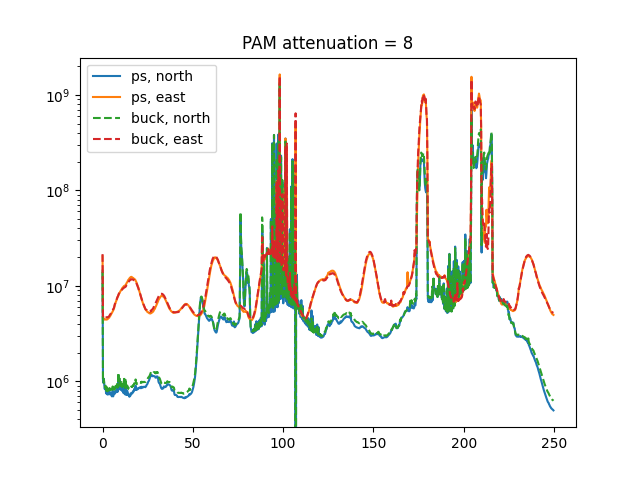

<IPython.core.display.Javascript object>


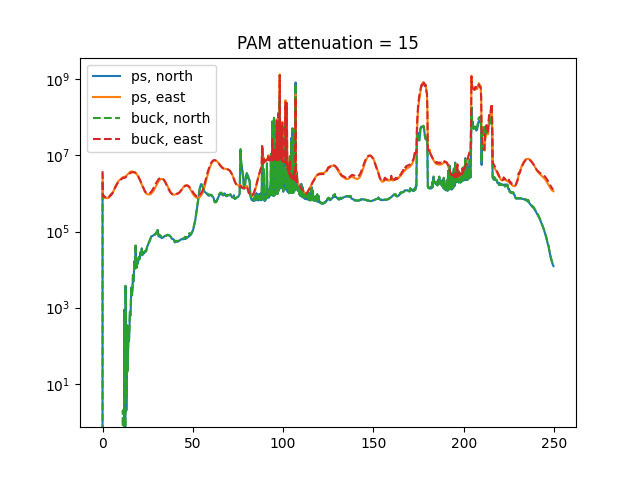

<IPython.core.display.Javascript object>


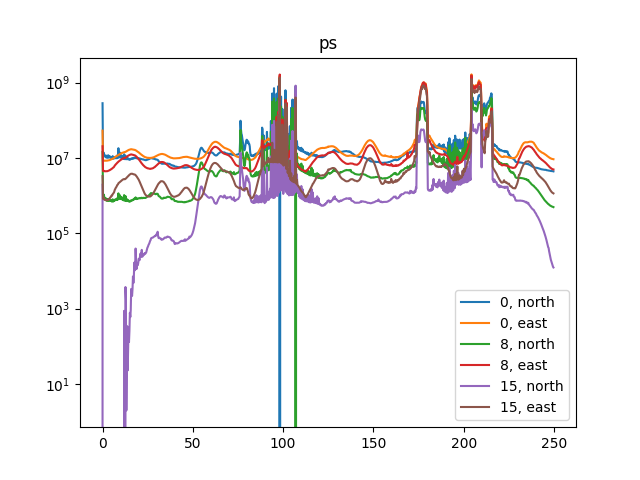

<IPython.core.display.Javascript object>


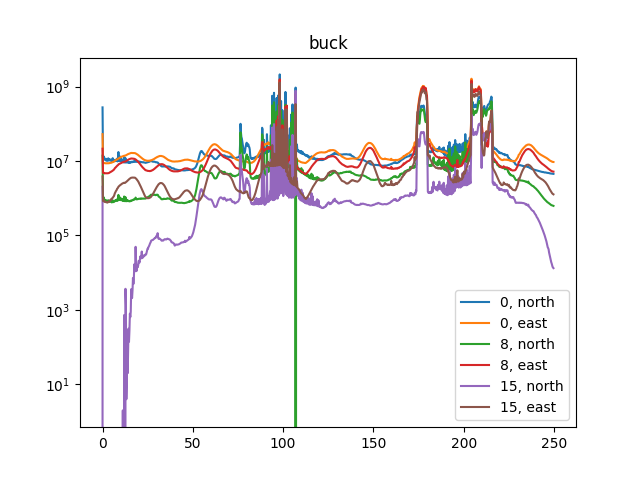

In [46]:
atten_plots(data)
power_plots(data)

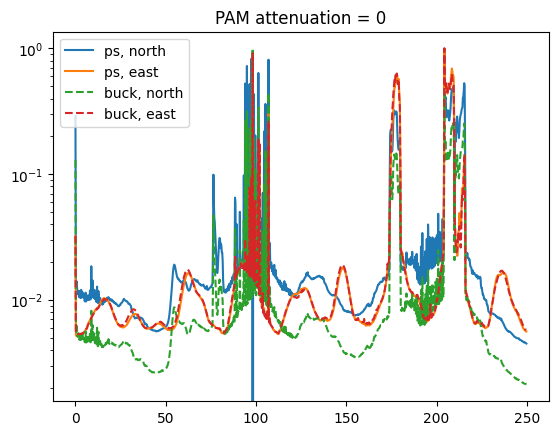

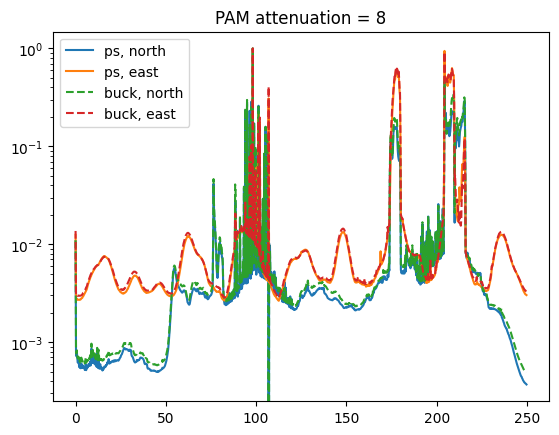

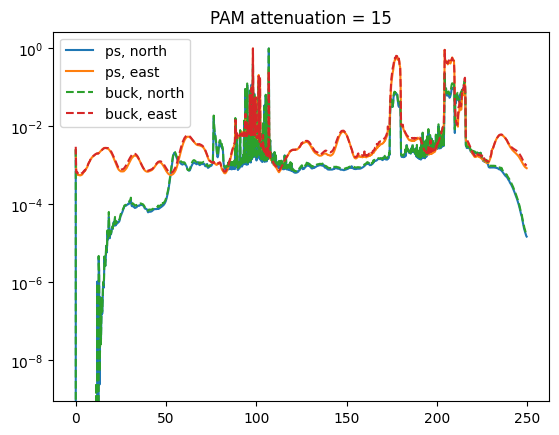

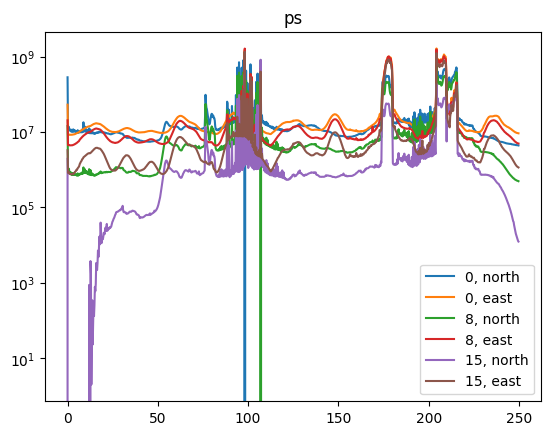

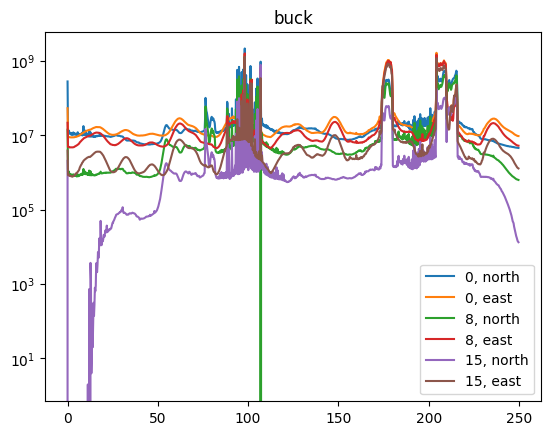

In [43]:
atten_plots(norm)
power_plots(norm)

### Add filters & attenuators between PAM and SNAP

Same setup as above, this time with 41-800 MHz and DC-190 MHz filter + 10dB attenuation. PAM attenuation fixed to 15.

In [11]:
data_filter = {}
norm_filter = {}
for p in ["ps", "buck"]:  # pam power from 6V power supply or 12V power supply + buck converter
    data_filter[p] = {}
    norm_filter[p] = {}
    d, nd = read_dat(f"{p}_with_antenna_filters_10dB.npz")
    data_filter[p][15] = d  # 15 is Pam atten
    norm_filter[p][15] = nd

<IPython.core.display.Javascript object>


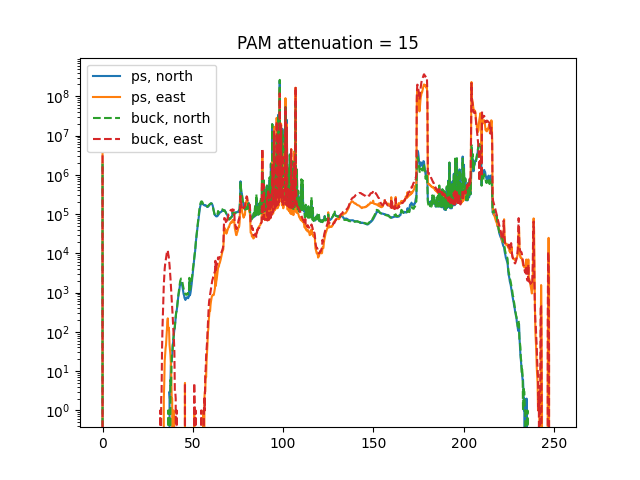

<IPython.core.display.Javascript object>


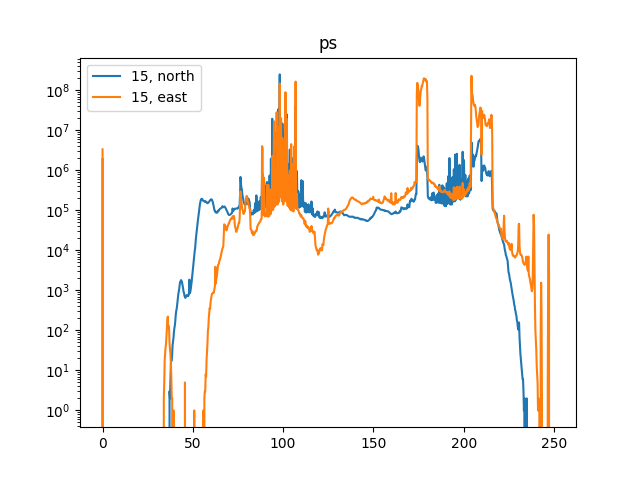

<IPython.core.display.Javascript object>


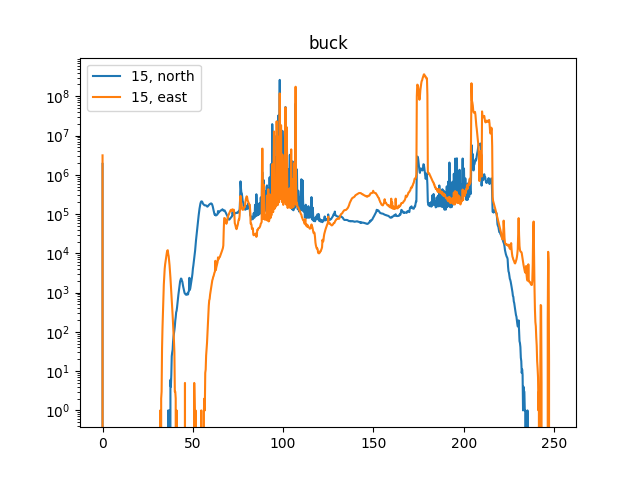

In [12]:
atten_plots(data_filter, atten=[15])
power_plots(data_filter, atten=[15])